In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
from datetime import datetime, timedelta
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [2]:
agency = pd.read_csv('agency.csv')
calendar = pd.read_csv('calendar.csv')
routes = pd.read_csv('routes.csv')
shapes = pd.read_csv('shapes.csv')
stop_times = pd.read_csv('stop_times.csv')
stops = pd.read_csv('stops.csv')
trips = pd.read_csv('trips.csv')

In [3]:
display(agency)
#Not very useful

,agency_id,agency_name,agency_url,agency_timezone,agency_lang,agency_phone,agency_fare_url,agency_email
0,DMRC,Delhi Metro Rail Corporation,http://www.delhimetrorail.com/,Asia/Kolkata,NaN,NaN,NaN,NaN


In [4]:
display(calendar)
#Not very useful

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,weekday,1,1,1,1,1,0,0,20190101,20251231
1,saturday,0,0,0,0,0,1,0,20190101,20251231
2,sunday,0,0,0,0,0,0,1,20190101,20251231


,route_id,service_id,trip_id,trip_headsign,trip_short_name,direction_id,block_id,shape_id,wheelchair_accessible,bikes_allowed
0,0,weekday,0,NaN,NaN,NaN,NaN,shp_1_30,0,0
1,0,weekday,1,NaN,NaN,NaN,NaN,shp_1_30,0,0
2,0,weekday,10,NaN,NaN,NaN,NaN,shp_1_30,0,0
3,0,weekday,100,NaN,NaN,NaN,NaN,shp_1_30,0,0
4,2,weekday,1000,NaN,NaN,NaN,NaN,shp_1_13,0,0
...,...,...,...,...,...,...,...,...,...,...
5433,18,weekday,9487,NaN,NaN,NaN,NaN,shp_1_6,0,0
5434,18,weekday,9488,NaN,NaN,NaN,NaN,shp_1_6,0,0
5435,18,weekday,9489,NaN,NaN,NaN,NaN,shp_1_6,0,0
5436,18,weekday,9490,NaN,NaN,NaN,NaN,shp_1_6,0,0


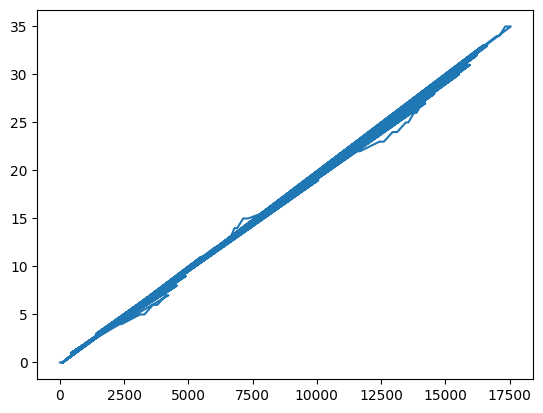

In [5]:
display(trips)
plt.plot(trips['trip_id'], trips['route_id'])
#Mapping route to trip id which follows a linear trend

In [6]:
display(routes)
#id mapping to route

,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color,route_sort_order,continuous_pickup,continuous_drop_off
0,33,NaN,R_SP_R,RAPID_Phase 3 (Rapid Metro) to Sector 55-56 (R...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
1,31,NaN,G_DD_R,GRAY_Dhansa Bus Stand to Dwarka,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
2,29,NaN,P_MS_R,PINK_Shiv Vihar to Majlis Park,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
3,12,NaN,M_JB,MAGENTA_Janak Puri West to Botanical Garden,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
4,11,NaN,P_MS,PINK_Majlis Park to Shiv Vihar,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
5,18,NaN,R_RD_R,RED_Dilshad Garden to Rithala,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
6,9,NaN,V_KB,VIOLET_Kashmere Gate to Badarpur Border,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
7,1,NaN,R_RS,RED_Rithala to Shaheed Sthal (New Bus Adda),NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
8,22,NaN,Y_HQ_R,YELLOW_Qutab Minar to Huda City Centre,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
9,8,NaN,G_IB,GREEN_Inderlok to Brigadier Hoshiyar Singh,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
display(stops)
#The various points in the sequence correspond to the stops and this gives their locations and id

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon
0,1,NaN,Dilshad Garden,NaN,28.675991,77.321495
1,2,NaN,Jhilmil,NaN,28.675648,77.312393
2,3,NaN,Mansrover park,NaN,28.675352,77.301178
3,4,NaN,Shahdara,NaN,28.673531,77.287270
4,5,NaN,Welcome,NaN,28.671986,77.277931
...,...,...,...,...,...,...
257,516,NaN,Pari Chowk,NaN,28.463331,77.508308
258,517,NaN,Alpha 1,NaN,28.470879,77.512718
259,518,NaN,Delta 1,NaN,28.478374,77.525581
260,519,NaN,GNIDA Office,NaN,28.484531,77.536621


In [8]:
display(shapes)
#The route shapes

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled
0,shp_1_2,28.615887,77.022461,1,0.000
1,shp_1_2,28.616341,77.022499,2,50.510
2,shp_1_2,28.617985,77.022453,3,233.586
3,shp_1_2,28.618252,77.022453,4,263.487
4,shp_1_2,28.618425,77.022438,5,282.857
...,...,...,...,...,...
6638,shp_1_36,28.574263,77.065308,265,41959.496
6639,shp_1_36,28.574263,77.065308,266,41959.496
6640,shp_1_36,28.565706,77.064896,267,42912.887
6641,shp_1_36,28.565706,77.064896,268,42912.887


In [9]:
shapes['shape_id'] = shapes['shape_id'].str.replace('shp_1_', '', regex=False)
shapes['shape_id'] = shapes['shape_id'].astype(int)
ids = shapes['shape_id'].unique().tolist()

In [10]:
shapes['shape_id'] -= 1 #To ensure equal indices
print(sorted(shapes['shape_id'].unique().tolist()))
print(sorted(routes['route_id'].unique().tolist()))



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]


In [17]:
# Creating a dictionary mapping route_id to route_short_name
route_name_map = routes.set_index('route_id')['route_short_name'].to_dict()

#Combining the id mapping in routes to shapes
shapes['name'] = shapes['shape_id'].map(route_name_map)
shapes['shape_id'] +=1

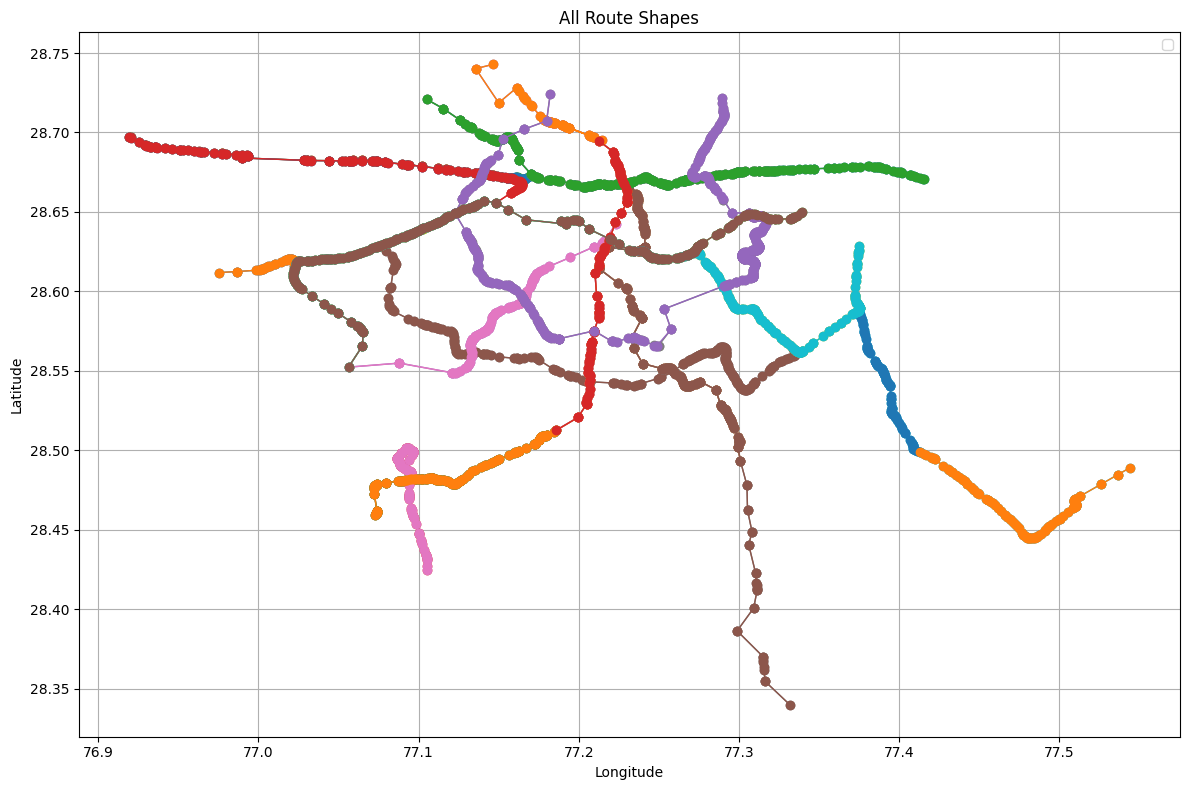

In [18]:
#Plotting the routes
plt.figure(figsize=(12, 8))
for id in ids:
    df = shapes[shapes['shape_id'] == id]
    df = df.sort_values(by='shape_pt_sequence')
    plt.plot(df['shape_pt_lon'], df['shape_pt_lat'], linewidth=1, marker = 'o')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('All Route Shapes')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

In [19]:
#Plotting the map in plotly and in map format
df = shapes.copy()
fig = go.Figure()
#Colour palette
colors = px.colors.qualitative.Set3
if len(ids) > len(colors):
    colors = colors * (len(ids) // len(colors) + 1)

for i, route_id in enumerate(ids):
    df = shapes[shapes['shape_id'] == route_id]
    df = df.sort_values(by='shape_pt_sequence')

    route_name = df['name'].iloc[0]

    # Adding trace for each route
    fig.add_trace(go.Scatter(
        x=df['shape_pt_lon'],
        y=df['shape_pt_lat'],
        mode='lines+markers',
        name=route_name,
        line=dict(
            color=colors[i % len(colors)],
            width=3,
            shape='spline',  # Smooth curves
        ),
        marker=dict(
            size=6,
            color=colors[i % len(colors)],
            line=dict(width=1, color='white'),
            opacity=0.8
        ),
        hovertemplate='<b>%{fullData.name}</b><br>' +
                      'Longitude: %{x:.4f}<br>' +
                      'Latitude: %{y:.4f}<br>' +
                      '<extra></extra>',
        showlegend=True
    ))

#Update layout
fig.update_layout(
    title={
        'text': '<b>Transit Route Network Visualization</b>',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 24, 'color': '#2c3e50'}
    },
    xaxis_title='<b>Longitude</b>',
    yaxis_title='<b>Latitude</b>',

    plot_bgcolor='rgba(248, 249, 250, 0.9)',
    paper_bgcolor='white',

    #grid
    xaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='rgba(128, 128, 128, 0.2)',
        showline=True,
        linewidth=2,
        linecolor='rgba(128, 128, 128, 0.3)',
        title_font=dict(size=14, color='#34495e'),
        tickfont=dict(size=12, color='#34495e')
    ),
    yaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='rgba(128, 128, 128, 0.2)',
        showline=True,
        linewidth=2,
        linecolor='rgba(128, 128, 128, 0.3)',
        title_font=dict(size=14, color='#34495e'),
        tickfont=dict(size=12, color='#34495e')
    ),

    # Legend
    legend=dict(
        bgcolor='rgba(255, 255, 255, 0.9)',
        bordercolor='rgba(128, 128, 128, 0.3)',
        borderwidth=1,
        font=dict(size=11, color='#2c3e50'),
        x=1.02,
        y=1,
        xanchor='left',
        yanchor='top'
    ),

    autosize=True,
    width=1000,
    height=700,
    margin=dict(l=80, r=120, t=80, b=80),

    hoverlabel=dict(
        bgcolor='rgba(255, 255, 255, 0.95)',
        bordercolor='rgba(128, 128, 128, 0.5)',
        font_size=12,
        font_family='Arial'
    )
)

fig.update_traces(
    line_shape='spline',
    hoverinfo='all'
)

fig.show()





In [20]:
#Plotting in the map form of plotly
fig_map = go.Figure()

for i, route_id in enumerate(ids):
    df = shapes[shapes['shape_id'] == route_id]
    df = df.sort_values(by='shape_pt_sequence')

    # Get route name
    route_name = df['name'].iloc[0]

    fig_map.add_trace(go.Scattermapbox(
        lon=df['shape_pt_lon'],
        lat=df['shape_pt_lat'],
        mode='lines+markers',
        name=route_name,
        line=dict(width=3, color=colors[i % len(colors)]),
        marker=dict(size=6, color=colors[i % len(colors)])
    ))

fig_map.update_layout(
    title='Transit Routes on Map',
    mapbox=dict(
        style='open-street-map',
        center=dict(
            lat=df['shape_pt_lat'].mean(),
            lon=df['shape_pt_lon'].mean()
        ),
        zoom=10
    ),
    height=700
)

fig_map.show()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,timepoint,continuous_pickup,continuous_drop_off
0,0,05:28:08,05:28:28,21,0,NaN,0,0,0.000,1,NaN,NaN
1,0,05:30:58,05:31:18,20,1,NaN,0,0,1202.405,1,NaN,NaN
2,0,05:33:28,05:33:48,19,2,NaN,0,0,2480.750,1,NaN,NaN
3,0,05:35:33,05:35:53,18,3,NaN,0,0,3314.936,1,NaN,NaN
4,0,05:37:53,05:38:13,17,4,NaN,0,0,4300.216,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
88195,12564,20:23:00,20:23:20,105,33,NaN,0,0,38284.914,1,NaN,NaN
88196,12564,20:25:01,20:25:21,106,34,NaN,0,0,39012.934,1,NaN,NaN
88197,12564,20:27:15,20:27:35,107,35,NaN,0,0,40045.957,1,NaN,NaN
88198,12564,20:29:20,20:29:40,108,36,NaN,0,0,40972.098,1,NaN,NaN


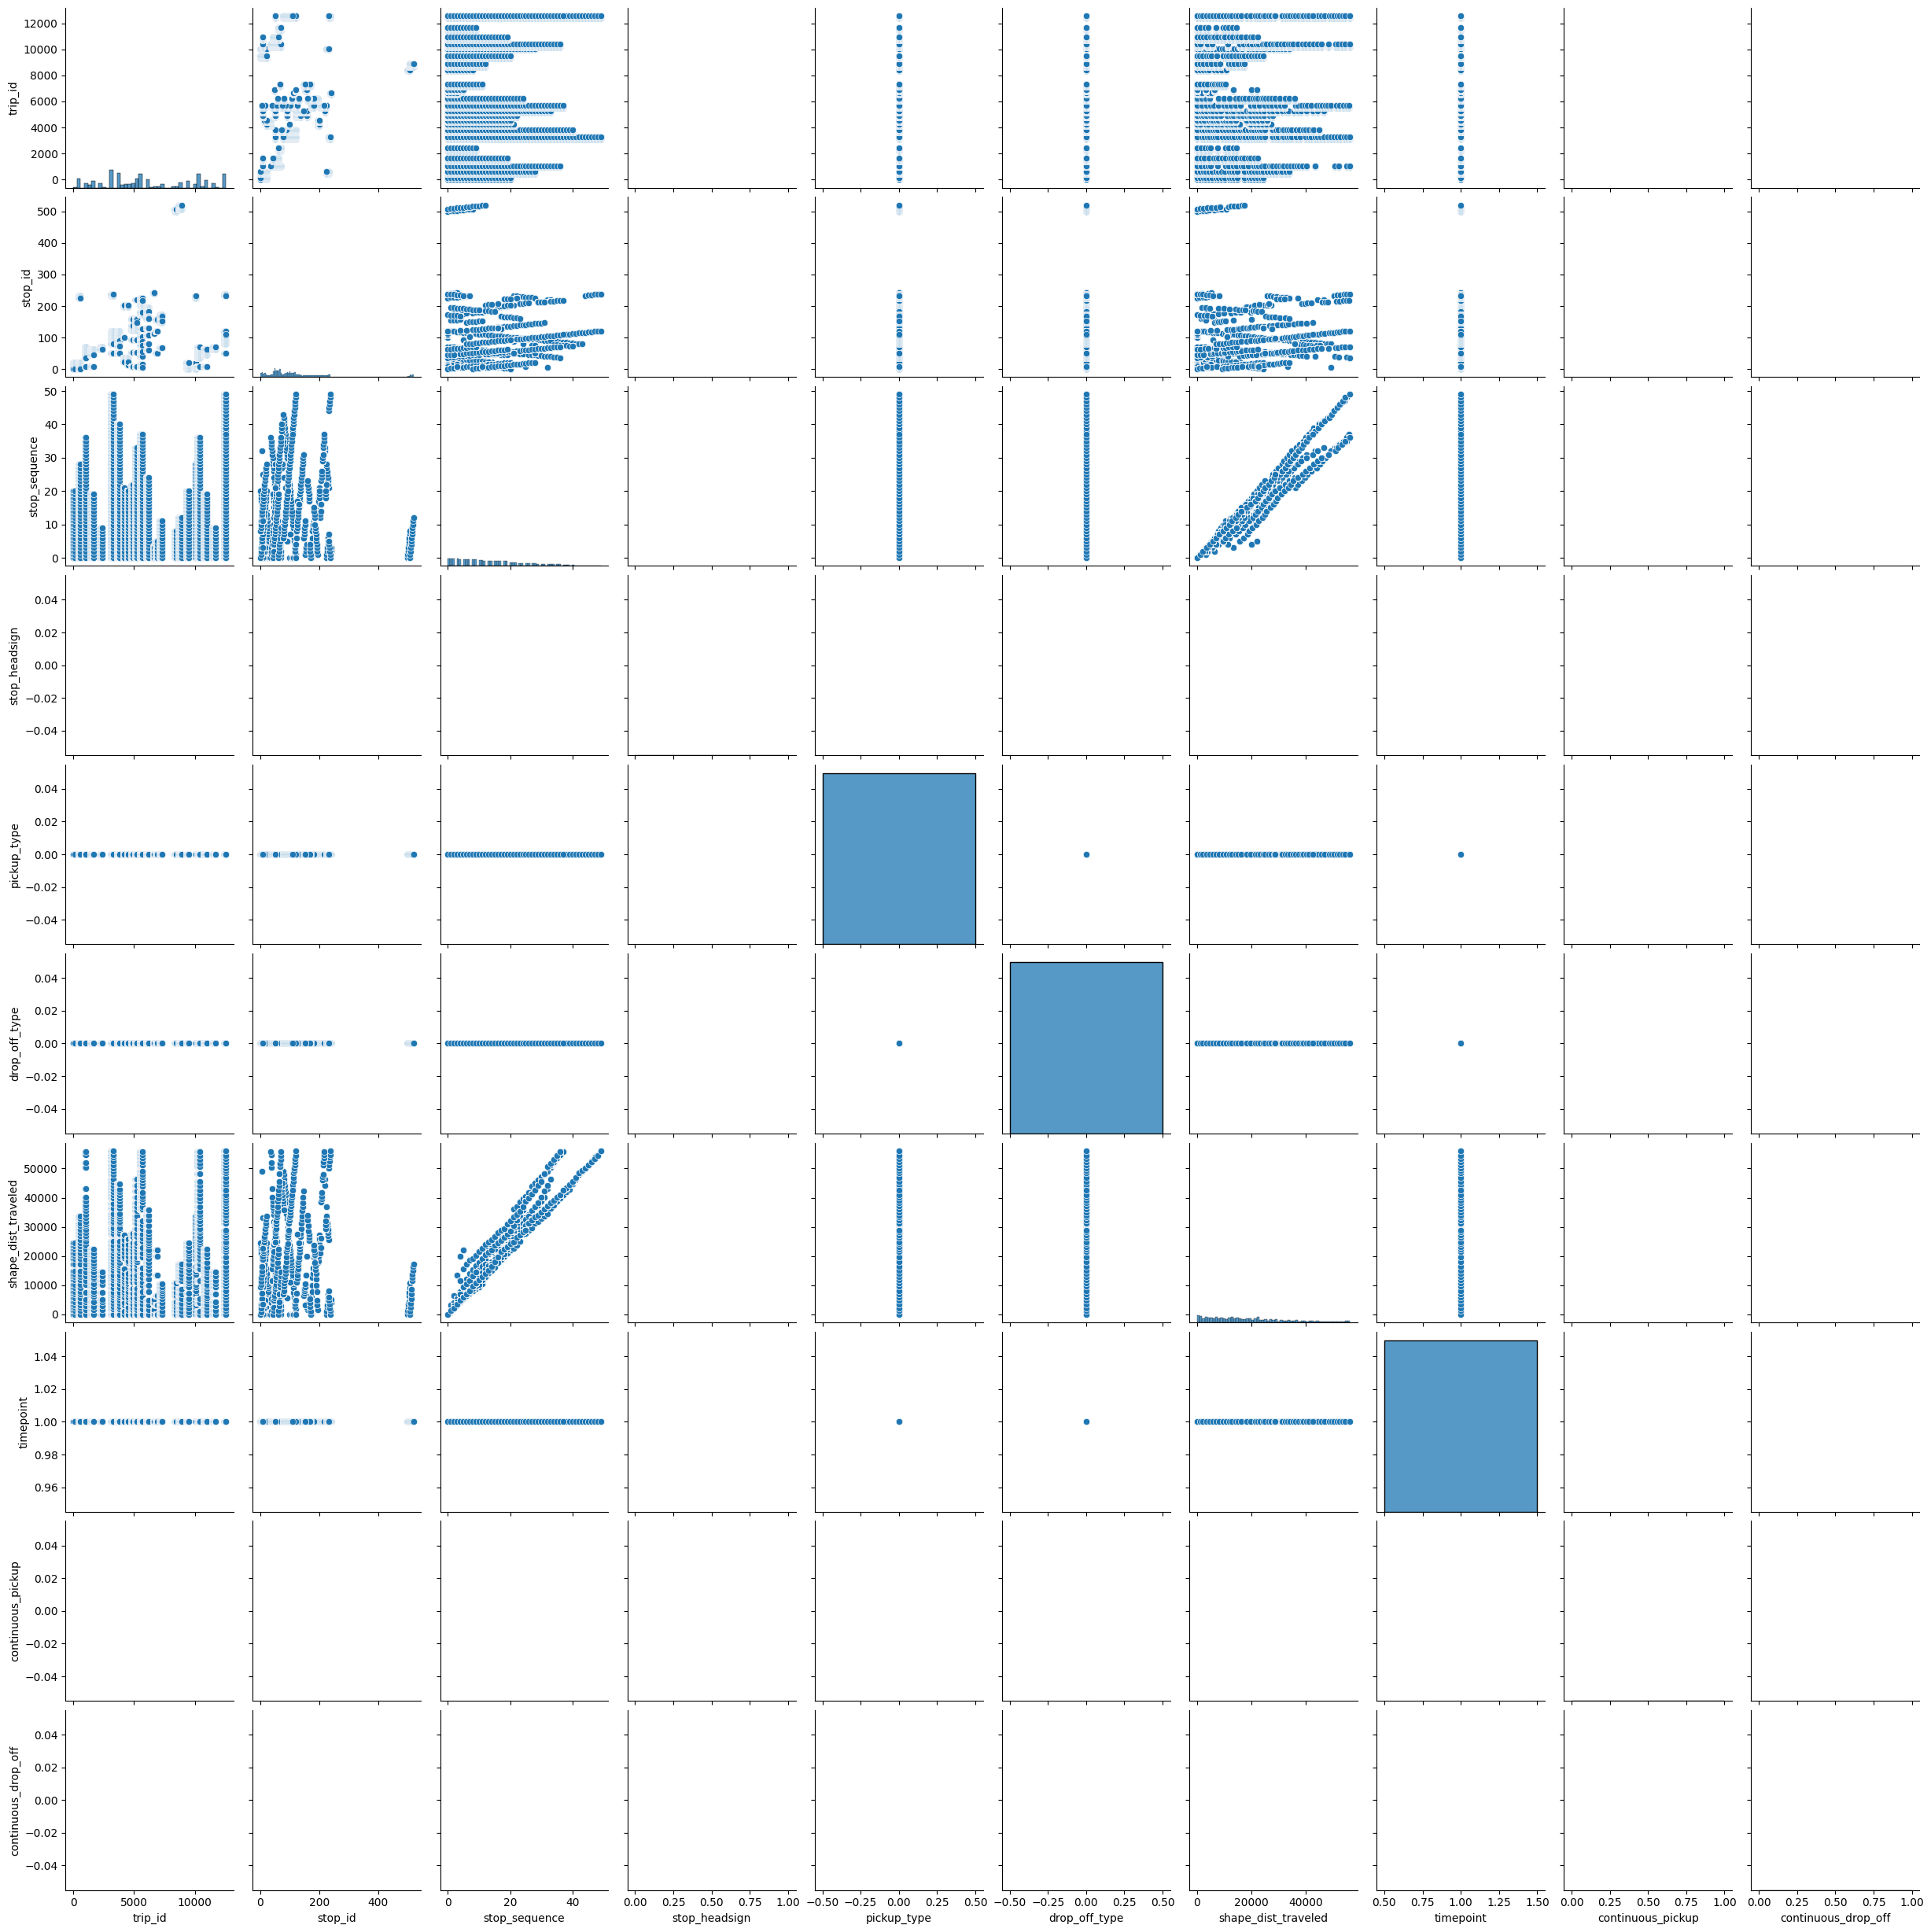

In [21]:
display(stop_times)
sns.pairplot(stop_times)